In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath(".."))

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_blobs

# from svm.soft_margin_svm import SoftMarginSVM
# from preprocessing.ohe import OneHotEncoder
# from linear_models.classification.softmax_regression import SoftMaxRegression
# from neighbors.knn_classifier import KNeighborsClassifier
# from linear_models.classification.logistic_regression import LogisticRegression
# from linear_models.regression.linear_regression import LinearRegression
# from linear_models.classification.least_squares_classifier import LeastSquareClassifier
# from classification.perceptron import Perceptron

In [2]:
def visualize_model(x_train, labels, model, degree = 1):
    f = plt.figure(figsize = (8,8))
    x1_min = np.min(x_train[:,0])
    x1_max = np.max(x_train[:,0])
    x2_min = np.min(x_train[:,1])
    x2_max = np.max(x_train[:,1])
    
    x1_test, x2_test = np.meshgrid(np.linspace(x1_min, x1_max, 100), 
                                   np.linspace(x2_min, x2_max, 100))
    x_test_poly = np.array([x1_test, x2_test]).reshape(2, -1).T
    y_test = model.predict(x_test_poly)

    flat_labels = labels.flatten()
    sns.scatterplot(data = x_train, x = x_train[:,0], y = x_train[:,1], hue = labels)
    plt.contourf(x1_test, x2_test, y_test.reshape(100,100), alpha = 0.5, levels = np.linspace(0,1,3))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.gca().set_aspect('equal', adjustable = 'box')
    plt.show()

In [3]:
from neighbors.knn_regressor import KNeighborsRegressor

In [10]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_features = 2, centers = 2)
xtrain, xtest, ytrain, ytest = train_test_split(X[:,0], X[:,1], random_state = 42)

In [13]:
kn = KNeighborsRegressor(n_neighbors = 3,
                 distance_metric = 'Euclidian')
kn.fit(xtrain, ytrain)

In [15]:
yhat = kn.predict(xtest)

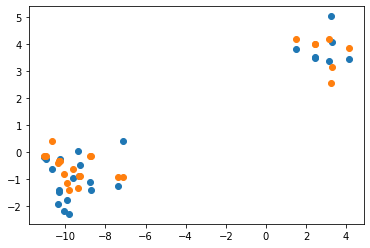

In [18]:
plt.scatter(xtest, ytest)
plt.scatter(xtest, yhat)

In [16]:
yhat

array([-1.15748413,  4.02113647, -0.13050335, -0.61594544,  2.57050993,
       -0.13958874, -0.92679063, -0.31934204, -0.13958874, -0.8996569 ,
        4.19648017, -0.92679063, -1.42021773, -1.32259398, -0.13050335,
        4.20503534,  3.84931321, -0.31934204, -0.80488087, -0.40269879,
       -0.31934204, -0.8996569 ,  4.02113647,  3.14177128,  0.42060414])

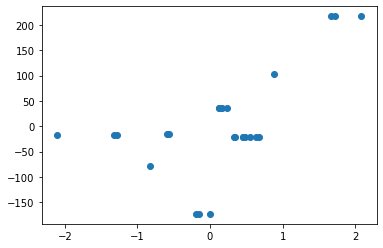

In [7]:
plt.scatter(xtest, yhat)

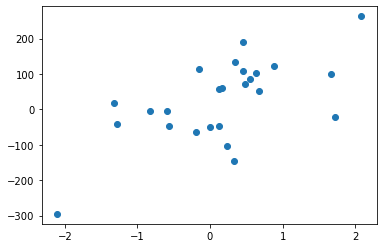

In [8]:
plt.scatter(xtest, ytest)

In [9]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, yhat)

17491.143331760562